<a href="https://colab.research.google.com/github/poojagolande256-ui/Learning_Studio/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 Change runtime type->T4 GPU

Multiclass Classification-More than 2 class

In [162]:

from warnings import filterwarnings
filterwarnings("ignore")


Step 2 Data Ingestion

In [163]:
url1="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"

In [164]:
import pandas as pd
df=pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Step 3 Basic Data Quality Check

Target cell- Weather type

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [166]:
df.shape

(13200, 11)

In [167]:
df.duplicated().sum()

np.int64(0)

In [168]:
df.isnull().sum()[df.isnull().sum()>0]

,0


In [169]:
df["Weather Type"].nunique()

4

In [170]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [171]:
df["Weather Type"].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


Step 4 Seperate X & Y variables

In [172]:
x=df.drop(columns=["Weather Type"])
y=df["Weather Type"]

In [173]:
x.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [174]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


Step 5 Train Test Split

In [175]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [176]:
xtrain.shape

(10560, 10)

In [177]:
xtest.shape

(2640, 10)

Step 6 Apply Preprocessing on x

In [178]:
cat_cols=x.select_dtypes(include="object").columns
cat_cols

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

In [179]:
num_cols=x.select_dtypes(exclude="object").columns
num_cols

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [180]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [181]:
num_pipeline=make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler())


In [182]:
cat_pipeline=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False,drop="first"))

In [183]:
pre=ColumnTransformer([
    ("num",num_pipeline,num_cols),
    ("cat",cat_pipeline,cat_cols)
]).set_output(transform="pandas")

In [184]:
pre.fit(xtrain)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Cloud Cover', 'Season', 'Location'], dtype='object'))])

In [185]:
xtrain_pre=pre.transform(xtrain)
xtrain_pre

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
1897,1.655383,1.698788,1.618232,1.204945,0.217557,1.029291,-0.877796,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5950,0.849318,-2.213408,-0.336091,-1.552857,0.307939,1.806355,0.305957,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12786,0.388709,-2.213408,-0.625621,-1.552857,0.373967,1.547333,1.193772,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8484,0.158405,-0.480157,-1.204679,-0.236634,0.133129,-0.524837,0.897834,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2701,0.446285,0.213144,-0.770385,-0.487343,0.211875,-0.783858,0.305957,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.561437,-0.083985,-0.336091,1.204945,0.250030,-0.265816,-0.433889,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
905,0.561437,0.114101,1.618232,1.016913,0.212687,2.065376,0.305957,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5192,1.828111,1.154052,0.604879,0.797542,0.316869,-0.783858,0.749865,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
12172,1.137198,-0.331592,-1.204679,-1.270809,0.431876,0.511248,0.897834,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [186]:
xtest_pre=pre.transform(xtest)
xtest_pre

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
8308,-0.532508,-0.430635,-0.118944,0.766203,0.144765,-0.783858,-0.581858,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5721,0.734166,0.757880,0.749644,0.954235,-0.248424,-0.265816,-1.321704,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10917,-1.511301,1.451181,-1.421826,1.486992,-0.695463,-0.783858,-1.469673,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12605,-1.568877,1.203573,-1.204679,0.045414,-0.516593,-0.783858,-0.877796,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8506,1.194774,-1.817236,-0.336091,-1.458841,0.597486,0.511248,0.749865,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,0.446285,0.807402,0.025820,0.452817,0.271408,-1.042880,-0.581858,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1366,-0.877964,0.163622,0.822026,0.985574,-0.496027,-1.042880,-1.173735,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5891,0.561437,0.609316,0.025820,0.797542,-0.033293,-0.524837,-0.581858,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9209,-0.014323,-0.282071,0.387732,-0.142618,0.084691,-0.265816,0.453926,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Step 7 Onehotencoding for Target Feature

In [187]:
ytrain_pre=pd.get_dummies(ytrain,dtype=int)
ytrain_pre.head()

,Cloudy,Rainy,Snowy,Sunny
1897,1,0,0,0
5950,0,0,0,1
12786,0,0,0,1
8484,1,0,0,0
2701,1,0,0,0


In [188]:
ytest_pre=pd.get_dummies(ytest,dtype=int)
ytest_pre.head()

,Cloudy,Rainy,Snowy,Sunny
8308,0,1,0,0
5721,0,1,0,0
10917,0,0,1,0
12605,0,0,1,0
8506,0,0,0,1


Step 8 Neural Network Model Training

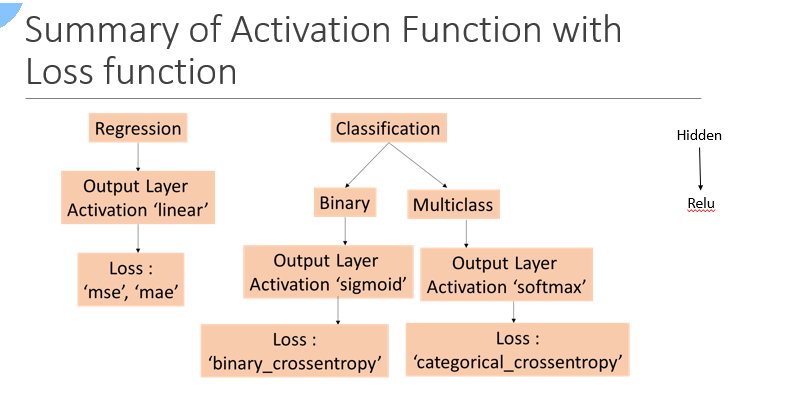

In [189]:
xtrain_pre.shape[1]

15

In [190]:
ytrain_pre.shape[1]

4

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [192]:
model=Sequential(
    [
                 Input(shape=(xtrain_pre.shape[1],)),
                 Dense(64,activation='relu'),
                 Dropout(0.2),
                 Dense(32,activation='relu'),
                 Dropout(0.2),
                 Dense(ytrain_pre.shape[1],activation='softmax'),
    ]
)

In [193]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,236 (12.64 KB)

 Trainable params: 3,236 (12.64 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

Step 9 Model Building

In [195]:
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min',restore_best_weights=True)

In [196]:
hist=model.fit(xtrain_pre,ytrain_pre,epochs=100,callbacks=[es],validation_split=0.2)

Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6339 - loss: 0.9646 - val_accuracy: 0.8726 - val_loss: 0.4119
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.4532 - val_accuracy: 0.8797 - val_loss: 0.3281
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 0.3826 - val_accuracy: 0.8902 - val_loss: 0.2887
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8811 - loss: 0.3349 - val_accuracy: 0.9020 - val_loss: 0.2622
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8864 - loss: 0.3009 - val_accuracy: 0.8982 - val_loss: 0.2472
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8935 - loss: 0.2837 - val_accuracy: 0.9020 - val_loss: 0.2353
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8978 - loss: 0.2721 - val_accuracy: 0.9020 - val_loss: 0.2277
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8949 - loss: 0.2606 - val_accu

Step 10 Plot Learning Rate

In [197]:
import matplotlib.pyplot as plt

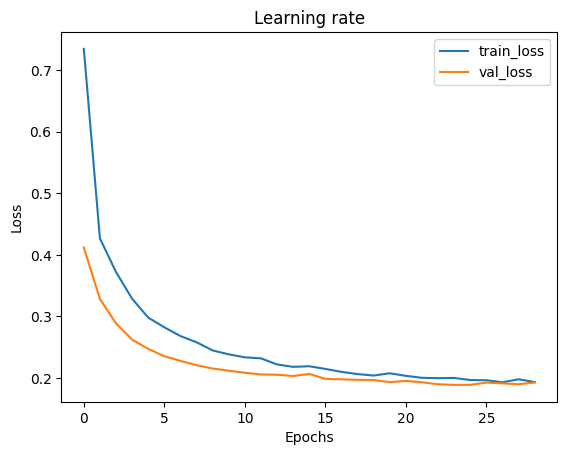

In [198]:
plt.plot(hist.history['loss'],label='train_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Learning rate")
plt.legend()
plt.show()

Step 11 Model Evaluation

In [201]:
xtrain_loss,xtrain_acc=model.evaluate(xtrain_pre,ytrain_pre)
print(f'Train Accuracy:{xtrain_acc:.4f}')
print(f'Train Loss:{xtrain_loss:.4f}')

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.1756
Train Accuracy:0.9160
Train Loss:0.1769


In [202]:
xtest_loss,xtest_acc=model.evaluate(xtest_pre,ytest_pre)
print(f'Test Accuracy:{xtest_acc:.4f}')
print(f'Test Loss:{xtest_loss:.4f}')


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9107 - loss: 0.1854
Test Accuracy:0.9068
Test Loss:0.1899


In [210]:
import numpy as np
test_probs = model.predict(xtest_pre)
probs_idx = np.argmax(test_probs, axis=1)
classes = ytrain_pre.columns.tolist()
test_preds = [classes[idx] for idx in probs_idx]
test_preds[0:5]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


['Rainy', 'Rainy', 'Snowy', 'Snowy', 'Sunny']

In [211]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

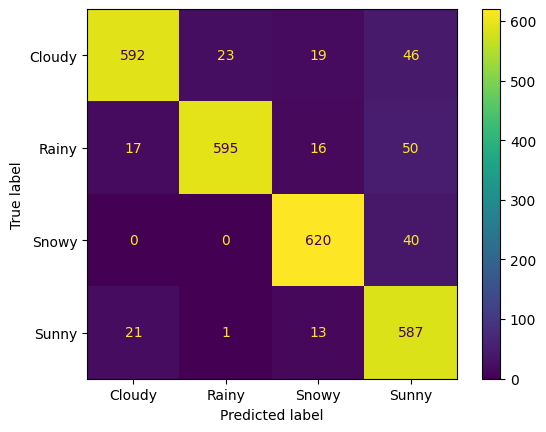

In [213]:
print(ConfusionMatrixDisplay.from_predictions(ytest,test_preds))

In [214]:
print(classification_report(ytest,test_preds))

              precision    recall  f1-score   support

      Cloudy       0.94      0.87      0.90       680
       Rainy       0.96      0.88      0.92       678
       Snowy       0.93      0.94      0.93       660
       Sunny       0.81      0.94      0.87       622

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



Step 12 Out of Sample Prediction-Model inference

In [216]:
url2="https://raw.githubusercontent.com/poojagolande256-ui/Learning_Studio/refs/heads/main/test_weather.csv"

In [218]:
xnew=pd.read_csv(url2)
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [221]:
xnew_pre=pre.transform(xnew)
xnew_pre

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-1.108268,-0.034463,0.894409,0.390140,-0.567467,-1.042880,-1.025766,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5.052370,1.896874,0.749644,0.922897,0.245971,1.806355,0.453926,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.014323,0.361708,0.387732,-0.581359,0.307128,-0.006794,0.749865,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.158405,1.500702,1.256320,0.000000,0.183732,-1.042880,-0.581858,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.791742,-2.163886,-0.263709,-1.490180,0.483291,0.511248,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.446285,-0.480157,-0.046562,-0.393327,-0.122322,-0.006794,0.749865,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
96,3.094784,0.658837,5.382114,1.675024,-0.086061,-1.042880,-1.469673,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
97,-0.993116,-0.430635,-0.987532,0.515494,-0.317157,-1.042880,-1.025766,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
98,0.791742,-1.222979,-1.204679,-1.333486,0.163437,0.770269,0.897834,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [223]:
x_probs=model.predict(xnew_pre)
classes=ytrain_pre.columns.tolist()
x_preds=[classes[np.argmax(x)] for x in x_probs]
x_preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [224]:
xnew["weather_type_pred"]=x_preds
xnew[classes]=x_probs.round(4)

In [225]:
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,weather_type_pred,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0001,0.9999,0.0000
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0742,0.0069,0.0000,0.9189
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9950,0.0022,0.0003,0.0025
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0118,0.9877,0.0002,0.0004
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0002,0.0000,0.0002,0.9995


In [226]:
xnew.to_csv("weather_results.csv",index=False)

Step 13 Save the model

In [227]:
import joblib

In [228]:
joblib.dump(pre,"preprocessor.joblib")

['preprocessor.joblib']

In [229]:
p=joblib.load("preprocessor.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Cloud Cover', 'Season', 'Location'], dtype='object'))])

In [230]:
model.save("weather_model.keras")